### Import libraries

In [69]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

### Import CSV files into an Dataframe

In [2]:
# import csv files
def create_dataframe(filename, sep, verbose=True):
    """Create pandas dataframe from a csv file
filename: the csv filename
sep: input here the kind of separator
    """
    df = pd.read_csv(filename, sep=sep)
    if verbose:
        print(df.info())
    return df

In [3]:
    df_test = create_dataframe("test.csv", ",")
    df_train = create_dataframe("train.csv", ",")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pcl

In [4]:
df = df_train.copy()

In [65]:
y = df['Survived']

In [66]:
y.shape

(891,)

In [5]:
df_train["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
              ..
C95            1
A34            1
E17            1
E63            1
T              1
Name: Cabin, Length: 147, dtype: int64

In [6]:
df_train["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
              ..
C95            1
A34            1
E17            1
E63            1
T              1
Name: Cabin, Length: 147, dtype: int64

In [7]:
df_train.columns
df_train[["Survived", "Age","SibSp", "Parch", "Pclass", "Fare"]].describe()
df_train[df_train["Fare"]> 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [8]:
#Check for people with a fare tickets higher than 500
df_train_rich = df_train[df_train["Fare"]> 500]
#df_train_rich.to_csv("train_fare_500.csv")

In [9]:
#Check the Fare for people which were in cabin category B
df_train_B = df_train[df_train["Cabin"].str[0] =="B"]
print(df_train[df_train["Cabin"].str[0] =="B"].describe())
# It seems one is at 0, let's check for this one

       PassengerId   Survived  Pclass        Age      SibSp      Parch  \
count    47.000000  47.000000    47.0  45.000000  47.000000  47.000000   
mean    521.808511   0.744681     1.0  34.955556   0.361702   0.574468   
std     252.725116   0.440755     0.0  15.491868   0.568198   0.773043   
min      32.000000   0.000000     1.0  11.000000   0.000000   0.000000   
25%     306.000000   0.500000     1.0  24.000000   0.000000   0.000000   
50%     540.000000   1.000000     1.0  33.000000   0.000000   0.000000   
75%     744.500000   1.000000     1.0  44.000000   1.000000   1.000000   
max     888.000000   1.000000     1.0  70.000000   2.000000   2.000000   

             Fare  
count   47.000000  
mean   113.505764  
std    109.301500  
min      0.000000  
25%     57.000000  
50%     80.000000  
75%    120.000000  
max    512.329200  


In [10]:
df_train["Cabin"].str[0].value_counts()
df_train["cabin_class"] = df_train["Cabin"].str[0]

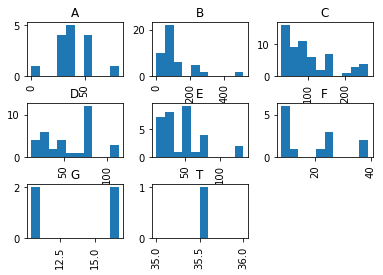

In [11]:
df_train["Fare"].hist(by=df_train['cabin_class'])
plt.show()   

In [12]:
#Create a dummy dataframe from the cabin class
df_dummy_cabin = pd.get_dummies(df_train['cabin_class'], prefix='cabin_class')
df_dummy_cabin

,cabin_class_A,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T
0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0
887,0,1,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0
889,0,0,1,0,0,0,0,0


In [13]:
#Add the dummy table to the first dataset
df_train = pd.concat([df_train, df_dummy_cabin],axis=1)

In [14]:
len(df_train)

891

In [15]:
def categorise_Sibsp(row):
    """Categorise the SibSp column into 3 categories
    output:
    2: if more than one sibling
    1: if one sibling only
    0: if no no
    """
    temp_dict={1:"Couple", 0:"Single"}
    if row in temp_dict.keys():
        return temp_dict[row]
    else:
        return "Family"

<function matplotlib.pyplot.show(close=None, block=None)>

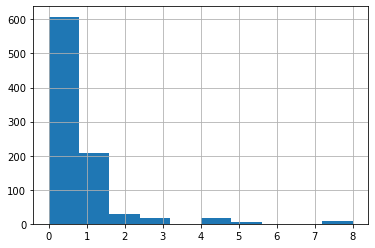

In [16]:
df_train["SibSp"].hist()
plt.show

In [17]:
df_train["SibSp_group"] = df_train["SibSp"].apply(lambda x: categorise_Sibsp(x))

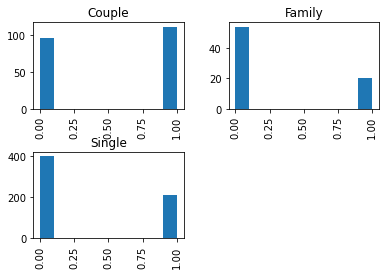

In [18]:
df_train["Survived"].hist(by=df_train['SibSp_group'])
plt.show()   

In [19]:
#Ratio of survivals:
survivals =  df_train["Survived"].value_counts()
print(survivals)

0    549
1    342
Name: Survived, dtype: int64


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  cabin_class    204 non-null    object 
 13  cabin_class_A  891 non-null    uint8  
 14  cabin_class_B  891 non-null    uint8  
 15  cabin_class_C  891 non-null    uint8  
 16  cabin_class_D  891 non-null    uint8  
 17  cabin_class_E  891 non-null    uint8  
 18  cabin_clas

In [21]:
df_train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
cabin_class      687
cabin_class_A      0
cabin_class_B      0
cabin_class_C      0
cabin_class_D      0
cabin_class_E      0
cabin_class_F      0
cabin_class_G      0
cabin_class_T      0
SibSp_group        0
dtype: int64

In [22]:
df_train["Cabin"].str[0].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
df_train.drop(['PassengerId',"Name","Ticket","Cabin"],axis=1,inplace=True)

In [24]:
df_train_encodedSex = pd.get_dummies(df_train['Sex'],prefix='EncodedSex')

In [25]:
df_train= pd.concat([df_train,df_train_encodedSex],axis=1)

In [26]:
len(df_train)

891

In [27]:
df_train_encodedEmbarked = pd.get_dummies(df_train['Embarked'],prefix='EncodedEmbarke')

In [28]:
df_train= pd.concat([df_train,df_train_encodedEmbarked],axis=1)

In [29]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_class,cabin_class_A,...,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T,SibSp_group,EncodedSex_female,EncodedSex_male,EncodedEmbarke_C,EncodedEmbarke_Q,EncodedEmbarke_S
0,0,3,male,22.0,1,0,7.2500,S,NaN,0,...,0,0,0,0,Couple,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,C,0,...,0,0,0,0,Couple,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,...,0,0,0,0,Single,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,C,0,...,0,0,0,0,Couple,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,...,0,0,0,0,Single,0,1,0,0,1


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    object 
 3   Age                714 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Fare               891 non-null    float64
 7   Embarked           889 non-null    object 
 8   cabin_class        204 non-null    object 
 9   cabin_class_A      891 non-null    uint8  
 10  cabin_class_B      891 non-null    uint8  
 11  cabin_class_C      891 non-null    uint8  
 12  cabin_class_D      891 non-null    uint8  
 13  cabin_class_E      891 non-null    uint8  
 14  cabin_class_F      891 non-null    uint8  
 15  cabin_class_G      891 non-null    uint8  
 16  cabin_class_T      891 non

In [33]:
df_train.drop('cabin_class',axis=1,inplace=True)

In [38]:
df_train['Age'].mean()

29.69911764705882

In [41]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [42]:
df_train['Age'] = df_train['Age'].astype(int)

In [43]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_class_A,cabin_class_B,...,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T,SibSp_group,EncodedSex_female,EncodedSex_male,EncodedEmbarke_C,EncodedEmbarke_Q,EncodedEmbarke_S
0,0,3,male,22,1,0,7.2500,S,0,0,...,0,0,0,0,Couple,0,1,0,0,1
1,1,1,female,38,1,0,71.2833,C,0,0,...,0,0,0,0,Couple,1,0,1,0,0
2,1,3,female,26,0,0,7.9250,S,0,0,...,0,0,0,0,Single,1,0,0,0,1
3,1,1,female,35,1,0,53.1000,S,0,0,...,0,0,0,0,Couple,1,0,0,0,1
4,0,3,male,35,0,0,8.0500,S,0,0,...,0,0,0,0,Single,0,1,0,0,1


In [44]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'cabin_class_A', 'cabin_class_B', 'cabin_class_C',
       'cabin_class_D', 'cabin_class_E', 'cabin_class_F', 'cabin_class_G',
       'cabin_class_T', 'SibSp_group', 'EncodedSex_female', 'EncodedSex_male',
       'EncodedEmbarke_C', 'EncodedEmbarke_Q', 'EncodedEmbarke_S'],
      dtype='object')

In [45]:
df_train.drop(["Embarked","Sex","SibSp"],axis=1,inplace=True)

In [46]:
df_train.head()

,Survived,Pclass,Age,Parch,Fare,cabin_class_A,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T,SibSp_group,EncodedSex_female,EncodedSex_male,EncodedEmbarke_C,EncodedEmbarke_Q,EncodedEmbarke_S
0,0,3,22,0,7.2500,0,0,0,0,0,0,0,0,Couple,0,1,0,0,1
1,1,1,38,0,71.2833,0,0,1,0,0,0,0,0,Couple,1,0,1,0,0
2,1,3,26,0,7.9250,0,0,0,0,0,0,0,0,Single,1,0,0,0,1
3,1,1,35,0,53.1000,0,0,1,0,0,0,0,0,Couple,1,0,0,0,1
4,0,3,35,0,8.0500,0,0,0,0,0,0,0,0,Single,0,1,0,0,1


In [47]:
df_train_encodedSibSp = pd.get_dummies(df_train['SibSp_group'],prefix='EncodedSibSp')

In [48]:
df_train =pd.concat([df_train,df_train_encodedSibSp],axis=1)

In [49]:
len(df_train)

891

In [54]:
df_train = df_train.drop('SibSp_group',axis=1)

In [55]:
df_train.head()

,Survived,Pclass,Age,Parch,Fare,cabin_class_A,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,...,cabin_class_G,cabin_class_T,EncodedSex_female,EncodedSex_male,EncodedEmbarke_C,EncodedEmbarke_Q,EncodedEmbarke_S,EncodedSibSp_Couple,EncodedSibSp_Family,EncodedSibSp_Single
0,0,3,22,0,7.2500,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,1,1,38,0,71.2833,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
2,1,3,26,0,7.9250,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,1,1,35,0,53.1000,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0,3,35,0,8.0500,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [51]:
scaler = StandardScaler()

In [56]:
df_train_norm = scaler.fit_transform(df_train)

In [58]:
df_train_norm

array([[-0.78927234,  0.82737724, -0.58004441, ...,  1.80642129,
        -0.30095727, -1.46574551],
       [ 1.2669898 , -1.56610693,  0.65011226, ...,  1.80642129,
        -0.30095727, -1.46574551],
       [ 1.2669898 ,  0.82737724, -0.27250525, ..., -0.55358072,
        -0.30095727,  0.68224668],
       ...,
       [-0.78927234,  0.82737724, -0.04185087, ...,  1.80642129,
        -0.30095727, -1.46574551],
       [ 1.2669898 , -1.56610693, -0.27250525, ..., -0.55358072,
        -0.30095727,  0.68224668],
       [-0.78927234,  0.82737724,  0.18880351, ..., -0.55358072,
        -0.30095727,  0.68224668]])

In [60]:
df_train_norm.shape

(891, 21)

In [62]:
columns = df_train.columns
columns

Index(['Survived', 'Pclass', 'Age', 'Parch', 'Fare', 'cabin_class_A',
       'cabin_class_B', 'cabin_class_C', 'cabin_class_D', 'cabin_class_E',
       'cabin_class_F', 'cabin_class_G', 'cabin_class_T', 'EncodedSex_female',
       'EncodedSex_male', 'EncodedEmbarke_C', 'EncodedEmbarke_Q',
       'EncodedEmbarke_S', 'EncodedSibSp_Couple', 'EncodedSibSp_Family',
       'EncodedSibSp_Single'],
      dtype='object')

In [64]:
df1 = pd.DataFrame(data=df_train_norm, columns=columns )
df1.head()

,Survived,Pclass,Age,Parch,Fare,cabin_class_A,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,...,cabin_class_G,cabin_class_T,EncodedSex_female,EncodedSex_male,EncodedEmbarke_C,EncodedEmbarke_Q,EncodedEmbarke_S,EncodedSibSp_Couple,EncodedSibSp_Family,EncodedSibSp_Single
0,-0.789272,0.827377,-0.580044,-0.473674,-0.502445,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,...,-0.067153,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.619306,1.806421,-0.300957,-1.465746
1,1.266990,-1.566107,0.650112,-0.473674,0.786845,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,...,-0.067153,-0.03352,1.355574,-1.355574,2.074505,-0.307562,-1.614710,1.806421,-0.300957,-1.465746
2,1.266990,0.827377,-0.272505,-0.473674,-0.488854,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,...,-0.067153,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.619306,-0.553581,-0.300957,0.682247
3,1.266990,-1.566107,0.419458,-0.473674,0.420730,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,...,-0.067153,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.619306,1.806421,-0.300957,-1.465746
4,-0.789272,0.827377,0.419458,-0.473674,-0.486337,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,...,-0.067153,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.619306,-0.553581,-0.300957,0.682247


In [67]:
X = df1.drop('Survived',axis=1)

In [70]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [72]:
clf.predict(X.iloc[:2, :])

array([0, 1], dtype=int64)

In [76]:
y[:2]

0    0
1    1
Name: Survived, dtype: int64